In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as linear_model

In [54]:
df=pd.read_csv("insurance.csv")

In [55]:
df.shape

(1338, 7)

In [56]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] 

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder_X = LabelEncoder()
X['sex'] = label_encoder_X.fit_transform(X['sex'])
X['smoker'] = label_encoder_X.fit_transform(X['smoker'])
X['region'] = label_encoder_X.fit_transform(X['region'])

print(X.head()) 

   age  sex   bmi  children  smoker  region
0   19    0  27.9         0       1       3
1   18    1  33.8         1       0       2
2   28    1  33.0         3       0       2
3   33    1  22.7         0       0       1
4   32    1  28.9         0       0       1


/tmp/ipykernel_6394/615539281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = label_encoder_X.fit_transform(X['sex'])
/tmp/ipykernel_6394/615539281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = label_encoder_X.fit_transform(X['smoker'])
/tmp/ipykernel_6394/615539281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [58]:
Y = df['expenses']

In [59]:
X.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [61]:
X_train

,age,sex,bmi,children,smoker,region
621,37,1,34.1,4,1,3
194,18,1,34.4,0,0,2
240,23,0,36.7,2,1,0
1168,32,1,35.2,2,0,3
1192,58,0,32.4,1,0,0
...,...,...,...,...,...,...
763,27,1,26.0,0,0,0
835,42,1,36.0,2,0,2
1216,40,1,25.1,0,0,2
559,19,1,35.5,0,0,1


In [62]:
X_test

,age,sex,bmi,children,smoker,region
578,52,1,30.2,1,0,3
610,47,0,29.4,1,0,2
569,48,1,40.6,2,1,1
1034,61,1,38.4,0,0,1
198,51,0,18.1,0,0,1
...,...,...,...,...,...,...
1084,62,0,30.5,2,0,1
726,41,1,28.4,1,0,1
1132,57,1,40.3,0,0,0
725,30,0,39.1,3,1,2


In [63]:
print(len(X_train))

1070


In [64]:
print(len(X_test))

268


In [65]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)  

In [66]:
print(X_train)

[[-0.14853305  1.01506676  0.54493962  2.41394802  1.97125461  1.30906493]
 [-1.49780784  1.01506676  0.59345325 -0.89219519 -0.50729114  0.40480446]
 [-1.14273553 -0.98515688  0.96539113  0.76087642  1.97125461 -1.4037165 ]
 ...
 [ 0.06451033  1.01506676 -0.91046946 -0.89219519 -0.50729114  0.40480446]
 [-1.42679338  1.01506676  0.77133659 -0.89219519 -0.50729114 -0.49945602]
 [-0.4325909  -0.98515688 -1.97776946 -0.06565939 -0.50729114  1.30906493]]


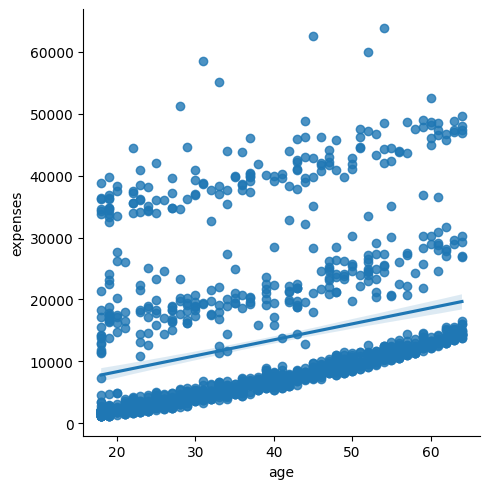

In [67]:
sns.lmplot(x='age',y='expenses',data=df)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
reg=LinearRegression()

In [70]:
reg.fit(X_train,Y_train)

LinearRegression()

In [71]:
X_test

array([[ 0.91668389,  1.01506676, -0.08573765, -0.06565939, -0.50729114,
         1.30906493],
       [ 0.56161157, -0.98515688, -0.21510735, -0.06565939, -0.50729114,
         0.40480446],
       [ 0.63262604,  1.01506676,  1.5960684 ,  0.76087642,  1.97125461,
        -0.49945602],
       ...,
       [ 1.2717562 ,  1.01506676,  1.54755476, -0.89219519, -0.50729114,
        -1.4037165 ],
       [-0.64563429, -0.98515688,  1.35350022,  1.58741222,  1.97125461,
         0.40480446],
       [ 0.49059711,  1.01506676, -0.9589831 ,  1.58741222, -0.50729114,
        -1.4037165 ]])

In [72]:
input_data = [[52, 1, 30.2, 1, 0, 3]]  

In [73]:
predicted_expenses = reg.predict(input_data)

In [74]:
print(f"Predicted expenses: ₹{predicted_expenses[0]:,.2f}")

Predicted expenses: ₹260,072.37


In [75]:
import joblib

# Assuming `reg` is your trained model
joblib.dump(reg, 'model1.pkl')


['model1.pkl']